# Capacity of Binary Symmetric Erasure Channel (BSEC)

## Description of binary symmetric erasure channel

The binary symmetric erasure channel (BSEC) has a binary input $x \in \{X_0,X_1\}$ and a ternary output $y \in \{Y_0,Y_1,Y_2\}$. Assuming $Y_0=X_0$ and $Y_1=X_1$, the third output symbol represents an erasure. An erasure symbol indicates that no information about the transmit symbol is available, i.e. we cannot infer any information about $x$. Erasures are different from errors because the erasure positions in a sequence of received symbols are known (received symbols $Y_2$) while error positions are not known. The BSEC is parametrized by two parameters, the error probability $P_e$ and the erasure probability $P_q$. Due to its symmetry, the likelihood function becomes

\begin{align}
    \Pr \{ y \mid x \} 
    &= \begin{cases}
            1 - P_e - P_q & \text{for } y = x \\
            P_e & \text{for } y \neq x \wedge y \neq Y_2 \\
            P_q & \text{for } y = Y_2 
       \end{cases} \\
    \Pr \{ y \} 
    &= \sum_x \Pr \{ y \mid x \} \cdot \Pr \{ x \} 
     = \begin{cases}
             P_0 (1-P_e-P_q) + (1-P_0) P_e & \text{for } y = Y_0 \\
             P_0 P_e + (1-P_0) (1-P_e-P_q) & \text{for } y = Y_1 \\
             P_0 P_q + (1-P_0) P_q = P_q & \text{for } y = Y_2 
        \end{cases} \\
    &= \begin{cases}
         P_0 (1-P_e) + (1-P_0)P_e - P_0P_q & \text{for } y = Y_0 \\
         P_0 P_e + (1-P_0)(1-P_e) - (1-P_0)P_q & \text{for } y = Y_1 \\
         P_q & \text{for } y = Y_2 .
        \end{cases}
\end{align}

For equally likely input symbols with $P_0=1/2$, we obtain the output distribution

\begin{align}
    \Pr \{ y \} 
    &= \sum_x \Pr \{ y \mid x \} \cdot \Pr \{ x \} 
     = \begin{cases}
         \frac{1}{2} (1-P_q) & \text{for } y = Y_0 \\
         \frac{1}{2} (1-P_q) & \text{for } y = Y_1 \\
         P_q & \text{for } y = Y_2 .
        \end{cases}
\end{align}

## Mutual Information and Channel Capacity

The mutual information of a communication channel is defined to

\begin{align}
    I({\cal X};{\cal Y}) 
    &= H({\cal X}) - H({\cal X} \mid {\cal Y})
     = H({\cal Y}) - H({\cal Y} \mid {\cal X})
     = H({\cal X}) + H({\cal Y}) - H({\cal X}, {\cal Y}) \\
    &= \sum_x \Pr \{ {\cal X}=x \} \cdot \sum_y \Pr \{ {\cal Y}=y \mid {\cal X}=x \} \cdot 
        \log_2 \frac{ \Pr \{ {\cal Y}=y \mid {\cal X}=x \} }{ \Pr \{ {\cal Y}=y \} }
\end{align}

Due to the channel's symmetry it can be shown that the uniform input distrution with $P_0=0.5$ maximizes the mutual information and achieves the channel capacity. Inserting the above probabilities into this expression yields after some basic transformations for equally likely input symbols 

\begin{align}
    C &= (1 - P_q) \cdot \left[ 1 - H_2 \left( \frac{P_e}{1-P_q} \right) \right] \; .
\end{align}


## AWGN Channel with Output Quantization

The probabilities $P_e$ and $P_q$ used above can be obtained by quantizing the continuous output of an AWGN channel into a three-valued output. The interval $[-a,a]$ around the origine is defined as the erasure region represented by symbol $Y_2$. The regions $[- \infty, -a]$ and $[a,\infty]$ will be represented by symbols $Y_0$ and $Y_1$, respectively. The parameter $a$ is a parameter which has to be optimized for each SNR. For a given $a$, the probabilities become

\begin{align}
    P_e &= \frac{1}{2} \cdot \mathrm{erfc} \left( (1+a) \sqrt{SNR} \right) \\
    P_q &= \frac{1}{2} \cdot \left[ \mathrm{erfc} \left(  (1-a) \sqrt{SNR} \right) - \mathrm{erfc} \left( (1+a) \sqrt{SNR} \right) \right] .
\end{align}

The figure below depicts the achievable mutual information versus the parameter $a$ for various SNR values given in dB. The optimal choice of $a$ is indicated by markers and clearly illustrates the dependency of $a_{opt}$ on the SNR. For low SNR, larger values $a$ maximize the mutual information. The transmission is rather unreliable and a large erasur area improves performance. Contrarily, high SNR prefer small $a$. Here, a very reliable transmission does not require erasures so much and a simple hard decision often provides the correct result. Consequently, $a$ tends to zero for high SNR leading to a BSC channel with hard decision. 

/Users/kuehn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log2
/Users/kuehn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log2


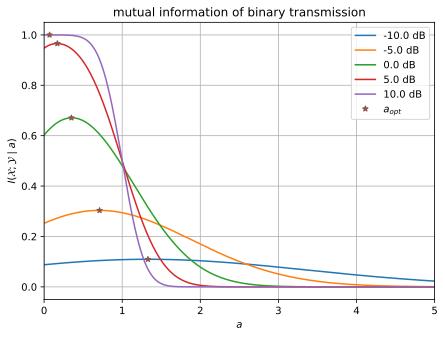

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from info_theory import mi_dmc, mi_awgn
from scipy import special


# BPSK alphabet and a priori probabilities
BPSK = ([-1,+1],[0.5,0.5])

# threshold assuming x in {-1, +1}
a = np.linspace(0,5,501)  

# SNR of AWGN channel
SNRdB   = np.linspace(-20,10,61)
SNR = 10**(SNRdB/10)

# error probability of BSEC
Pe = 0.5 * special.erfc(np.outer(np.ones(len(a))+a,np.sqrt(SNR)))

# erasure probability
Pq = 0.5 * (special.erfc(np.outer(np.ones(len(a))-a,np.sqrt(SNR))) - special.erfc(np.outer(np.ones(len(a))+a,np.sqrt(SNR))))
ONES = np.ones((len(a),len(SNRdB)))

# channel capacity as function of Pe and Pq
log1 = np.log2(ONES-Pe-Pq)
log1[np.isinf(log1)] = 0.0
log2 = np.log2(1-Pq)
log2[np.isinf(log2)] = 0.0
log3 = np.log2(Pe)
log3[np.isinf(log3)] = 0.0
C = ONES - Pq + (ONES-Pe-Pq)*log1 - (1-Pq)*log2 + Pe*log3

pos = np.argmax(C,axis=0)
Copt = np.max(C,axis=0)
            
ptr = np.linspace(20,60,5,dtype=int,endpoint=True)

fig1 = plt.figure(figsize=(7,5))
ax1 = fig1.add_subplot(111)
for run in np.arange(len(ptr)):
    ax1.plot(a, C[:,ptr[run]], '-', label=str(SNRdB[ptr[run]])+' dB')
ax1.plot(a[pos[ptr]], C[pos[ptr],ptr], '*', label='$a_{opt}$')
#plt.legend()
plt.grid(True)
plt.xlabel('$a$')
plt.ylabel('$I({\cal X};{\cal Y} \mid a)$')
plt.title('mutual information of binary transmission')
plt.xlim([0, 5])
plt.legend()
plt.show()   


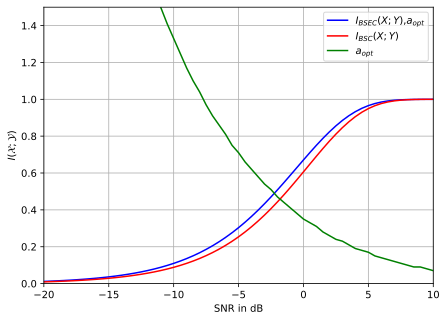

In [80]:
fig2 = plt.figure(figsize=(7,5))
ax2 = fig2.add_subplot(111)
ax2.plot(SNRdB, Copt, 'b-', label='$I_{BSEC}(X;Y)$,$a_{opt}$')
ax2.plot(SNRdB, C[1,:], 'r-', label='$I_{BSC}(X;Y)$')
ax2.plot(SNRdB, a[pos], 'g-', label='$a_{opt}$')
plt.grid(True)
plt.xlabel('SNR in dB')
plt.ylabel('$I({\cal X};{\cal Y})$')
plt.xlim(-20, 10)
plt.ylim(0, 1.5)
plt.legend()
plt.show()   


The figure above illustrates the optimal $a$ and the mutual information versus the signal to noise ratio. Again, it becomes obvious that $a$ decreases for growing SNR. Moreover, the benefit of the BSEC by allowing erasures compared to the BSC with simple hard decisions can be observed. It vanishes for large SNR. 